Коефіцієнт детермінації R^2, Скоригований коефіцієнт Adj 2R^2
Model A:
	- R²: 1.0000
	- R²_adj: 1.0000

Model B:
	- R²: 0.9782
	- R²_adj: 0.9778

Model C:
	- R²: 0.8819
	- R²_adj: 0.8811



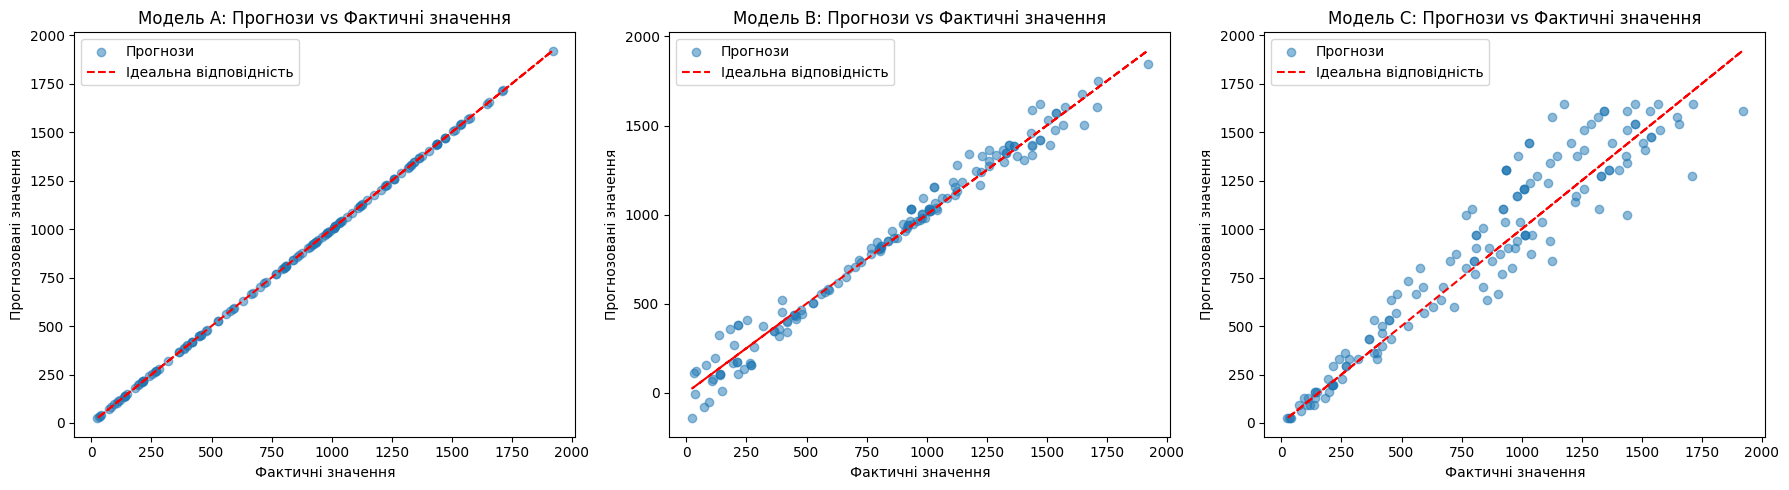

Метрики, засновані на помилках:
Model A:
	- MSE: 0.0000
	- RMSE: 0.0000
	- MAE: 0.0000

Model B:
	- MSE: 4888.0929
	- RMSE: 69.9149
	- MAE: 51.0724

Model C:
	- MSE: 26498.3117
	- RMSE: 162.7830
	- MAE: 120.6670

Відносні метрики:
Model A:
	- R²: 1.0000
	- Пояснена дисперсія: 1.0000

Model B:
	- R²: 0.9782
	- Пояснена дисперсія: 0.9785

Model C:
	- R²: 0.8819
	- Пояснена дисперсія: 0.8915



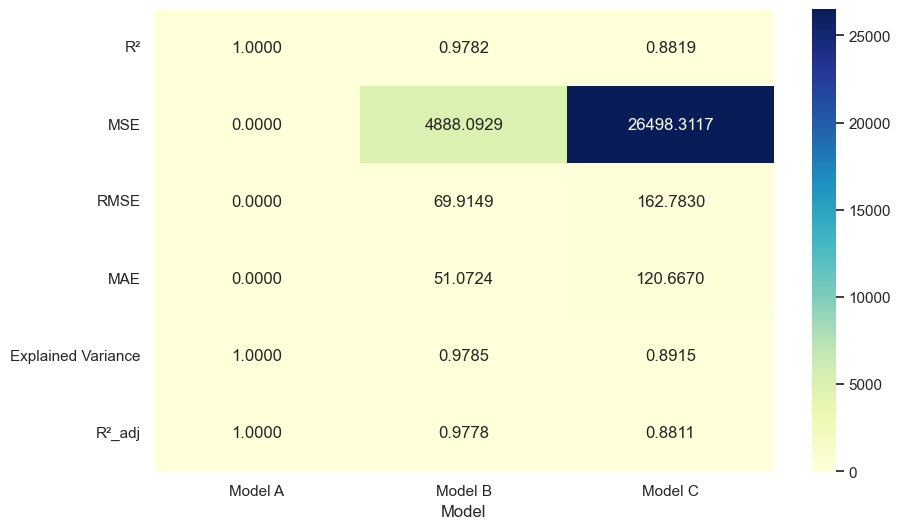

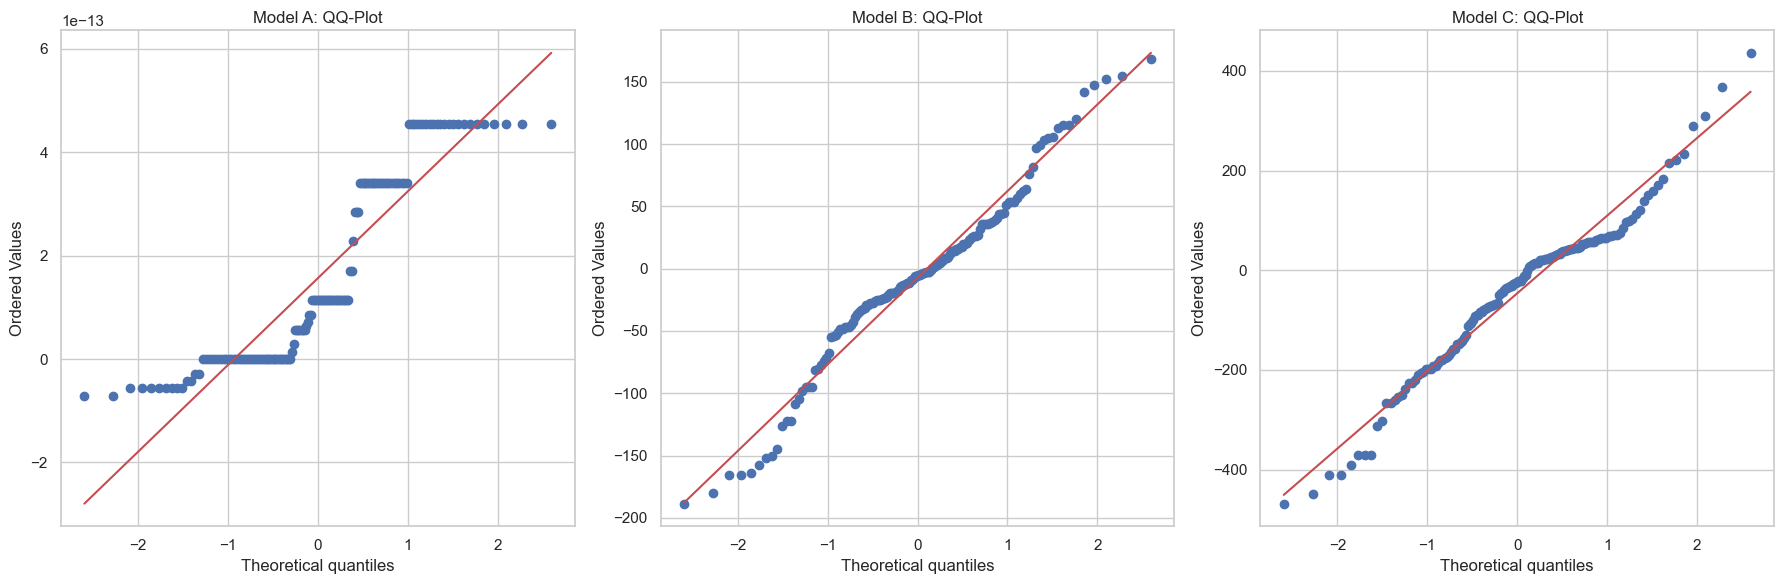

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, accuracy_score
import scipy.stats as stats

df = pd.read_csv("DatasetForCoffeeSales2.csv", encoding="latin1")

numeric_cols = ['Unit Price','Quantity','Sales Amount','Discount_Amount','Final Sales']

label_encoder = LabelEncoder()
scaler = StandardScaler()

df_copy = df.copy();

df_copy = df_copy.drop(columns=["Date", "Category", "City", "Product"])
df_copy["Used_Discount"] = df_copy["Used_Discount"].astype(int)

X = df_copy.drop(columns=["Final Sales"])
y = df_copy["Final Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створіть три моделі регресії різної складності:
# Модель A: Використовуйте всі доступні ознаки в наборі даних.
model_A = LinearRegression()
model_A.fit(X_train, y_train)
y_pred_A = model_A.predict(X_test)

# Модель B: Використовуйте підмножину ознак (приблизно половину), які здаються вам найважливішими.
X_train_B, X_test_B = X_train[["Unit Price", "Quantity", "Discount_Amount"]], X_test[["Unit Price", "Quantity", "Discount_Amount"]]
model_B = LinearRegression()
model_B.fit(X_train_B, y_train)
y_pred_B = model_B.predict(X_test_B)

# Модель C: Використовуйте лише 1-3 ознаки, які, на вашу думку, мають найсильніший зв’язок із цільовою змінною.
X_train_C, X_test_C = X_train[["Quantity"]], X_test[["Quantity"]]
model_C = LinearRegression()
model_C.fit(X_train_C, y_train)
y_pred_C = model_C.predict(X_test_C)


# Для кожної моделі обчисліть і повідомте:
# Коефіцієнт детермінації R^2
# Скоригований коефіцієнт Adj 2R^2
# Поясніть, чому ці метрики можуть відрізнятися між моделями.

# Коефіцієнт детермінації R²: Оцінює, яку частину варіації цільової змінної пояснює модель. Вищий R² вказує на кращу модель.
# Скоригований коефіцієнт R²_adj: Цей коефіцієнт враховує кількість ознак у моделі, дозволяючи оцінити, чи дійсно додавання нових змінних покращує модель.
n = X_test.shape[0]  
p_A = X_train.shape[1]  
p_B = X_train_B.shape[1]  
p_C = X_train_C.shape[1]  

results = [
    {"Model": "Model A", "R²": r2_score(y_test, y_pred_A), "MSE": mean_squared_error(y_test, y_pred_A), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_A)), "MAE": mean_absolute_error(y_test, y_pred_A),  "Explained Variance": 1 - (np.var(y_test - y_pred_A) / np.var(y_test))},
    {"Model": "Model B", "R²": r2_score(y_test, y_pred_B), "MSE": mean_squared_error(y_test, y_pred_B), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_B)), "MAE": mean_absolute_error(y_test, y_pred_B),  "Explained Variance": 1 - (np.var(y_test - y_pred_B) / np.var(y_test))},
    {"Model": "Model C", "R²": r2_score(y_test, y_pred_C), "MSE": mean_squared_error(y_test, y_pred_C), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_C)), "MAE": mean_absolute_error(y_test, y_pred_C),  "Explained Variance": 1 - (np.var(y_test - y_pred_C) / np.var(y_test))}
]

for item, p in zip(results, [p_A, p_B, p_C]):
    R2 = item["R²"]
    R2_adj = 1 - ((1 - R2) * (n - 1) / (n - p - 1)) if n > p + 1 else None 
    item["R²_adj"] = R2_adj


print('Коефіцієнт детермінації R^2, Скоригований коефіцієнт Adj 2R^2')
for item in results:
    print(f"{item['Model']}:\n\t- R²: {item['R²']:.4f}\n\t- R²_adj: {item['R²_adj']:.4f}\n")

# Візуалізуйте прогнози моделей проти фактичних значень за допомогою точкових діаграм. Які закономірності ви помічаєте?
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (model_name, y_pred) in enumerate(zip(["A", "B", "C"], [y_pred_A, y_pred_B, y_pred_C])):
    axes[i].scatter(y_test, y_pred, alpha=0.5, label="Прогнози")
    axes[i].plot(y_test, y_test, color='red', linestyle='--', label="Ідеальна відповідність")
    axes[i].set_xlabel("Фактичні значення")
    axes[i].set_ylabel("Прогнозовані значення")
    axes[i].set_title(f"Модель {model_name}: Прогнози vs Фактичні значення")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Метрики, засновані на помилках:
# Середньоквадратична помилка (MSE)
# Корінь середньоквадратичної помилки (RMSE)
# Середня абсолютна помилка (MAE)
print('Метрики, засновані на помилках:')
for item in results:
    print(f"{item['Model']}:\n"
          f"\t- MSE: {item['MSE']:.4f}\n"
          f"\t- RMSE: {item['RMSE']:.4f}\n"
          f"\t- MAE: {item['MAE']:.4f}\n")

# Відносні метрики:
# Показник R^2
# Пояснена дисперсія
print('Відносні метрики:')
for item in results:
    print(f"{item['Model']}:\n"
          f"\t- R²: {item['R²']:.4f}\n"
          f"\t- Пояснена дисперсія: {item['Explained Variance']:.4f}\n")

# Створіть таблицю для порівняння трьох моделей за кожною метрикою. Яка модель є найкращою за кожною з них? Чи змінюється рейтинг моделей залежно від метрики?
df_results = pd.DataFrame(results)

df_results["Best Model"] = df_results[["R²", "MSE", "RMSE", "MAE", "Explained Variance"]].idxmax(axis=0)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df_results.drop('Best Model', axis=1).set_index('Model').T, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)

plt.show()

# Побудуйте графіки залишків для кожної моделі. Що вони говорять про якість моделей?
# Розрахуємо залишки для кожної моделі
residuals_A = y_test - y_pred_A
residuals_B = y_test - y_pred_B
residuals_C = y_test - y_pred_C

# Побудуємо графіки залишків
plt.figure(figsize=(18, 6))

# QQ-plot для Model A
plt.subplot(1, 3, 1)
stats.probplot(residuals_A, dist="norm", plot=plt)
plt.title('Model A: QQ-Plot')

# QQ-plot для Model B
plt.subplot(1, 3, 2)
stats.probplot(residuals_B, dist="norm", plot=plt)
plt.title('Model B: QQ-Plot')

# QQ-plot для Model C
plt.subplot(1, 3, 3)
stats.probplot(residuals_C, dist="norm", plot=plt)
plt.title('Model C: QQ-Plot')

plt.tight_layout()
plt.show()

In [ ]:
# Метою цього дослідження є порівняння продуктивності трьох моделей лінійної регресії різної складності для прогнозування фінальних продажів кавової продукції, з урахуванням різних підходів до вибору ознак.

# Визначити, який рівень складності моделі є оптимальним для задачі прогнозування з точки зору точності та узагальненості.

# Порівняти метрики якості моделей (R², скоригований R², MSE, RMSE, MAE, пояснена дисперсія).

# Візуалізувати прогнози і залишки, щоб зрозуміти, як моделі справляються з різними типами відхилень.

# Пояснити, як вибір ознак впливає на якість прогнозу та стабільність моделей.

# Надати висновки, які можуть бути корисними для прийняття рішень у реальному бізнес-середовищі, зокрема у сфері аналітики продажів.